In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from matplotlib import rc
from numpy import inf
from matplotlib import gridspec

import os

rc('text', usetex=True)

import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=True)
rc('font', size=22)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

#
mpl.rcParams.update({'font.size': 19})
#mpl.rcParams.update({'legend.fontsize': 18})
mpl.rcParams.update({'xtick.labelsize': 18}) 
mpl.rcParams.update({'ytick.labelsize': 18}) 
mpl.rcParams.update({'text.usetex' : False})
mpl.rcParams.update({'axes.labelsize': 18}) 
mpl.rcParams.update({'legend.frameon': False}) 

import matplotlib.pyplot as plt
import mplhep as hep
#hep.set_style(hep.style.CMS)
hep.set_style("CMS") 


<ipython-input-1-8ac308742140>:35: FutureWarning: ``set_style`` is deprecated: Naming convention is changing to match mpl. Use ``mplhep.style.use()``.
  hep.set_style("CMS")


In [2]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
def make_error_boxes(ax, xdata, ydata, xerror, yerror, facecolor='r',
                     edgecolor='None', alpha=0.5):

    # Loop over data points; create box from errors at each point
    errorboxes = [Rectangle((x - xe[0], y - ye[0]), xe.sum(), ye.sum())
                  for x, y, xe, ye in zip(xdata, ydata, xerror.T, yerror.T)]

    # Create patch collection with specified colour/alpha
    pc = PatchCollection(errorboxes, facecolor=facecolor, alpha=alpha,
                         edgecolor=edgecolor)

    # Add collection to axes
    ax.add_collection(pc)

    # Plot errorbars
    artists = ax.errorbar(xdata, ydata, xerr=xerror, yerr=yerror,
                          fmt='None', ecolor='k')

In [3]:
#observable = 'dphi'
#observable = 'jetpt'
observable = 'qt'
#observable = 'jeteta'

symbol = {}
symbol['dphi'] = '$\Delta\phi$ '
symbol['jeteta'] = '$\eta^{jet}$'
symbol['qt']  = '$q_{T}/Q$'
symbol['jetpt'] = '$p_{T}^{jet}$'

y = {} 
x = {} 
xerr = {}

altmc = 'Django'
mc = 'Rapgap'
names = {}
names['nominal'] = 'outputfiles/CrossSection_%s_%s_nominal_ep0607_data_nominal.npy'%(observable,mc)
names['sys0']    = 'outputfiles/CrossSection_%s_%s_sys_0_ep0607_data_nominal.npy'%(observable,mc)
names['sys1']   =  'outputfiles/CrossSection_%s_%s_sys_1._ep0607_data_nominal.npy'%(observable,mc)
#names['sys4']   =  'outputfiles/CrossSection_%s_%s_sys_4_ep0607_data_nominal.npy'%(observable,mc)
names['sys5']   =  'outputfiles/CrossSection_%s_%s_sys_5_ep0607_data_nominal.npy'%(observable,mc)
names['sys7']   =  'outputfiles/CrossSection_%s_%s_sys_7_ep0607_data_nominal.npy'%(observable,mc)
#names['sys10']    = 'outputfiles/CrossSection_%s_%s_sys_10_ep0607_data_nominal.npy'%(observable,mc)
names['sys11']    = 'outputfiles/CrossSection_%s_%s_sys_11_ep0607_data_nominal.npy'%(observable,mc)
names['model']   = 'outputfiles/CrossSection_%s_%s_nominal_ep0607_data_nominal.npy'%(observable,altmc)


label = {}
label['test'] = 'repeat'
label['sys0'] = 'HFS scale (in jet)'
label['sys1'] = 'HFS scale (remainder)'
label['sys4'] = 'HFS polar angle'
label['sys5'] = 'HFS $\phi$ angle' 
label['sys7'] = 'Lepton energy scale'
label['sys10'] = 'Lepton polar angle'
label['sys11'] = 'Lepton $\phi$ angle'
label['nonclosure'] = 'Non-closure'
label['QED'] = 'QED rad corr.'

label['model'] = 'Model'
#names['sys10']   =  'CrossSection_jetpt_Django_nominal_em0405_data_nominal.npy'

## Load non-closure systematics

In [4]:
with open('outputfiles/NonClosure_dphi_%s.npy'%(mc) , 'rb') as f:
    nonclosure_dphi = np.load(f)
with open('outputfiles/NonClosure_jeteta_%s.npy'%(mc) , 'rb') as f:
    nonclosure_jeteta = np.load(f)    
with open('outputfiles/NonClosure_jetpt_%s.npy'%(mc) , 'rb') as f:
    nonclosure_jetpt = np.load(f)    
with open('outputfiles/NonClosure_jetqt_%s.npy'%(mc) , 'rb') as f:
    nonclosure_jetqt = np.load(f)    
print(nonclosure_dphi)
print(nonclosure_jeteta)
print(nonclosure_jetqt)
print(nonclosure_jetpt)


[1.04556781 0.94531818 0.9549371  0.97205027 1.00853412 1.02790312
 1.05794518]
[0.97603827 1.01109495 0.99106839 1.00963954 1.05267148]
[1.08640418 0.92691113 0.96810703 1.00244302 0.9890204  1.05187089
 1.10110723]
[1.00183793 0.98740741 1.02595336 0.99915262 1.00018676 0.97179382]


In [5]:
qedcorr_rapgap = {}
qedcorr_djangoh = {} 

with open('outputfiles/QEDCorrections_Rapgap.npy' , 'rb') as f:
    qedcorr_rapgap['jetpt'] = np.load(f)
    qedcorr_rapgap['jeteta'] = np.load(f)
    qedcorr_rapgap['qt'] = np.load(f)
    qedcorr_rapgap['dphi'] = np.load(f)
with open('outputfiles/QEDCorrections_Djangoh.npy' , 'rb') as f:
    qedcorr_djangoh['jetpt'] = np.load(f)
    qedcorr_djangoh['jeteta'] = np.load(f)
    qedcorr_djangoh['qt'] = np.load(f)
    qedcorr_djangoh['dphi'] = np.load(f)




In [6]:
for key in names.keys():
    with open('%s'%names[key], 'rb') as f:
        print(key)
        y[key] = np.load(f)
        x[key] = np.load(f)

        xerr[key] = np.load(f)
        
        print('y = ',y[key])
        print('x = ', x[key])
        #print(xerr[key])

nominal
y =  [3.74136939 3.13447784 1.57965575 0.6731262  0.22868876 0.07000363
 0.00634213]
x =  [0.03255231 0.10221884 0.20541467 0.38915407 0.71630072 1.2987829
 2.33588812]
sys0
y =  [3.70142121 3.21378998 1.58050452 0.66830904 0.22512394 0.06835034
 0.00654494]
x =  [0.03255231 0.10221884 0.20541467 0.38915407 0.71630072 1.2987829
 2.33588812]
sys1
y =  [3.69171866 3.20425148 1.59528121 0.6692015  0.22684687 0.0664411
 0.0064246 ]
x =  [0.03255231 0.10221884 0.20541467 0.38915407 0.71630072 1.2987829
 2.33588812]
sys5
y =  [3.71827092 3.21281885 1.58310712 0.66226959 0.22622252 0.06813634
 0.00643981]
x =  [0.03255231 0.10221884 0.20541467 0.38915407 0.71630072 1.2987829
 2.33588812]
sys7
y =  [3.59326877 3.17026848 1.60975922 0.6829354  0.2343997  0.06802599
 0.00609432]
x =  [0.03255231 0.10221884 0.20541467 0.38915407 0.71630072 1.2987829
 2.33588812]
sys11
y =  [3.67101319 3.15140791 1.62650637 0.66397866 0.2320297  0.06801517
 0.00581576]
x =  [0.03255231 0.10221884 0.2054146

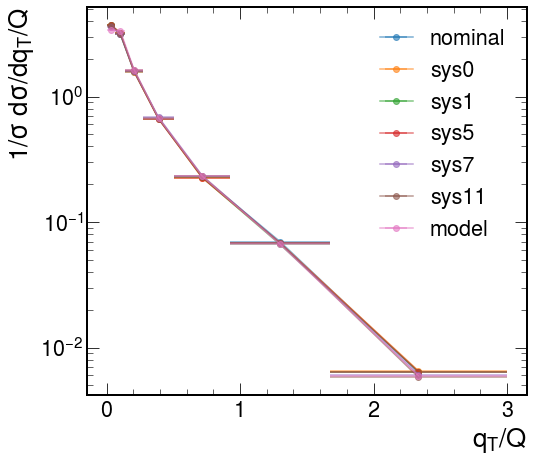

In [7]:
fig,ax = plt.subplots(figsize=(8,7))
for key in names.keys():
    plt.errorbar(x[key],y[key],xerr=xerr[key],fmt='o-',label=key,alpha=0.6)
    plt.yscale('log')
    #plt.xscale('log')
    
    plt.legend()
plt.ylabel(r'$1/\sigma$ $d\sigma/$d%s'%symbol[observable])
plt.xlabel(symbol[observable])

plt.tight_layout()
fig.savefig('figures/Systematic uncertainties_variations_%s.png'%observable)


# Plot the QED corrections

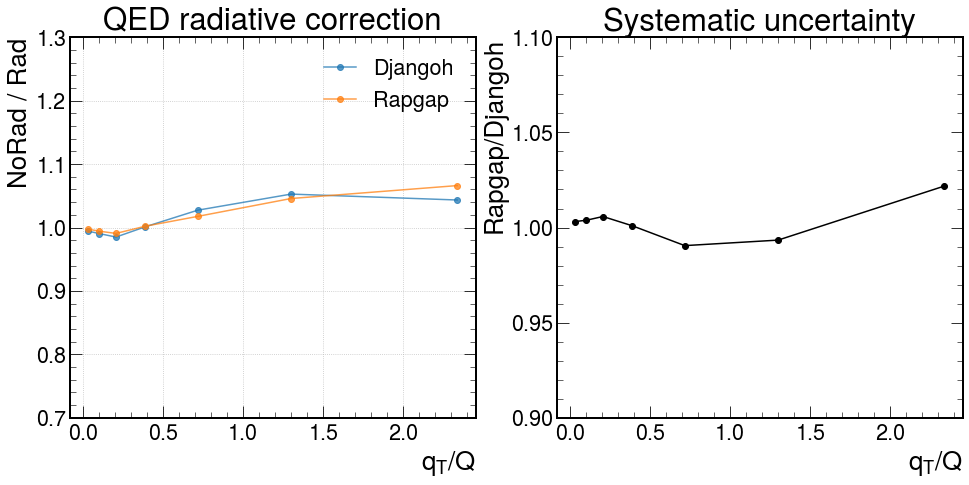

In [8]:
fig,ax = plt.subplots(1,2,figsize=(16,7))

ax[0].plot(x['nominal'],qedcorr_djangoh[observable],'o-',label='Djangoh',alpha=0.75)
ax[0].plot(x['nominal'],qedcorr_rapgap[observable], 'o-',label='Rapgap',alpha=0.75)
ax[0].set_ylim([0.7,1.3])
ax[0].grid()
ax[0].legend()
ax[0].set_ylabel('NoRad / Rad')
ax[0].set_title('QED radiative correction')
ax[0].set_xlabel(symbol[observable])

ax[1].plot(x['nominal'],np.divide(qedcorr_rapgap[observable],qedcorr_djangoh[observable]),'o-',alpha=1.0,color='k')
ax[1].set_ylabel('Rapgap/Djangoh')
ax[1].set_ylim([0.9,1.1])
ax[1].set_xlabel(symbol[observable])
ax[1].set_title('Systematic uncertainty')

qed_sys = np.divide(qedcorr_rapgap[observable],qedcorr_djangoh[observable])


In [9]:
y['QED'] = y['nominal']*qed_sys

In [10]:
#nonclosure_sys = 1.10
if 'dphi' in observable:
    nonclosure_sys = nonclosure_dphi
elif 'eta' in observable:
    nonclosure_sys = nonclosure_jeteta
elif 'qt' in observable:
    nonclosure_sys  = nonclosure_jetqt
elif 'pt' in observable:
    nonclosure_sys = nonclosure_jetpt
##if 'dphi' in observable or 'eta' in observable:
##    nonclosure_sys = 1.05
    
y['nonclosure'] = y['nominal']*nonclosure_sys
print (y.keys())

dict_keys(['nominal', 'sys0', 'sys1', 'sys5', 'sys7', 'sys11', 'model', 'QED', 'nonclosure'])


## Plot Systematic uncertainty

sys0
sys1
sys5
sys7
sys11
model
QED
nonclosure


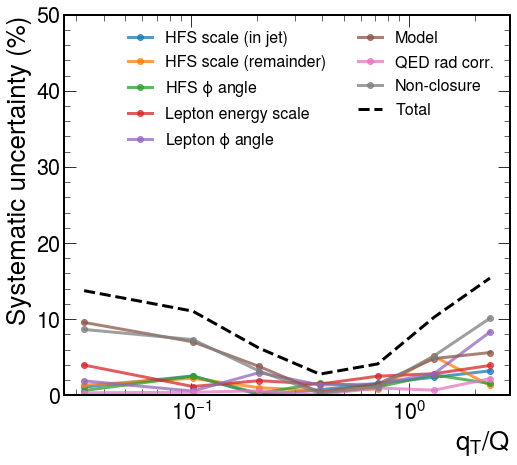

In [11]:
fig,ax = plt.subplots(figsize=(8,7))

total = np.zeros(len(y['nominal']))
ratio = {}

for key in y.keys():
    if 'nominal' in key:continue
    print (key)
    ratio[key] = np.divide(y[key],y['nominal']) -1
    total += ratio[key]*ratio[key]
    plt.plot(x['nominal'],100*abs(ratio[key]),'o-',label=label[key],lw=3,alpha=0.75)

total = np.sqrt(total)
N      = np.multiply( y['nominal'], xerr['nominal']*2.0)
#plt.plot(x['nominal'],100*np.sqrt(1/N), 'o--',label = 'stat error ',lw=3)
plt.plot(x['nominal'],100*total, '--',label = 'Total',lw=3,color='k')

plt.ylabel('Systematic uncertainty (%)')
plt.legend(loc='best',fontsize=16,ncol=2)
plt.xlabel(symbol[observable])

if 'qt' in observable  :
    plt.xscale('log')
plt.ylim([0,50])
plt.show()


fig.savefig('figures/Systematic uncertainties_%s.png'%observable)


In [12]:
with open('outputfiles/ResultwithSystematicUncertainties_%s.npy'%(observable), 'wb') as f:
    np.save(f,x['nominal'])
    np.save(f,y['nominal'])
    np.save(f,xerr['nominal'])
    np.save(f, total)


## Now all the uncertainties with the final run

In [13]:
unfolded_vals = {}
for i in range(4):
    for j in range(7):
        unfolded_vals[j,i] = np.load("outputfiles/unfolded_histos_o"+str(i)+"_s"+str(j)+".npy")

In [14]:
unfolded_vals_bootstraps = {}
for i in range(4):
    for j in range(1,100):
        unfolded_vals_bootstraps[j,i] = np.load("outputfiles/boostrapuncerts_unfolded_histos_o"+str(i)+"_s"+str(j)+".npy")

In [15]:
unfolded_vals_nonclosure = {}
for i in range(4):
    for j in range(7,9):
        unfolded_vals_nonclosure[j,i] = np.load("outputfiles/non_closure_histos_o"+str(i)+"_s"+str(j)+".npy")

In [16]:
bins = {}
dologx = [False,False,False,True]
dology = [True,False,True,True]

#jet pt
bins[0] = np.logspace(np.log10(10),np.log10(100),7)

#jet eta
bins[1] = np.linspace(-1,2.5,6)

#dphi
bins[2] = np.logspace(np.log10(0.03),np.log10(np.pi/2.0),9) - 0.03
bins[2] = bins[2][1:]
bins[2][0] = 0.0

#qt
bins[3] = np.logspace(np.log10(0.03),np.log10(3.03),9) - 0.03
bins[3] = bins[3][1:]
bins[3][0] = 0.0

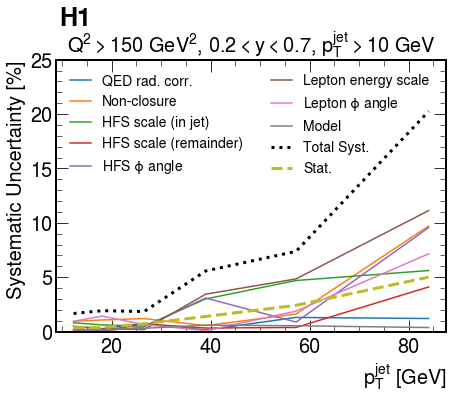

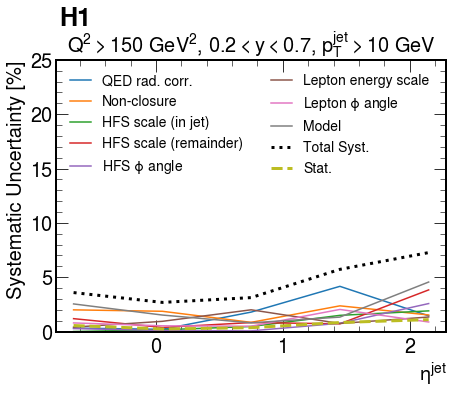

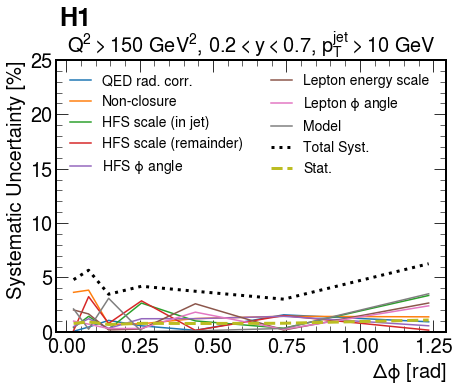

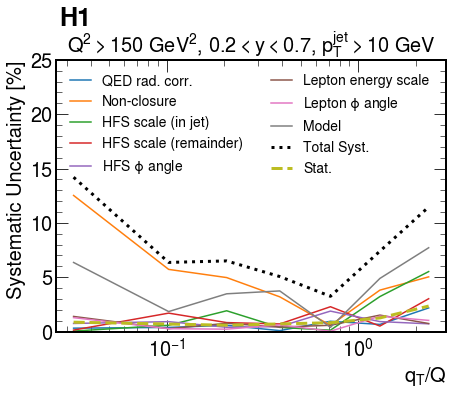

In [19]:
mylabels = ['jetpt','jeteta','dphi','qt']
myuncerts = ['nominal', 'sys0', 'sys1', 'sys5', 'sys7', 'sys11', 'model']
symbol = {}
symbol['dphi'] = '$\Delta\phi$ [rad]'
symbol['jeteta'] = '$\eta^{jet}$'
symbol['qt']  = '$q_{T}/Q$'
symbol['jetpt'] = '$p_{T}^{jet}$ [GeV]'
for j in range(4):
    
    fig = plt.figure(figsize=(7, 5)) 
    gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
    ax0 = plt.subplot(gs[0])
    ax0.yaxis.set_ticks_position('both')
    ax0.xaxis.set_ticks_position('both')
    ax0.tick_params(direction="in",which="both")
    ax0.minorticks_on()
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    
    mytot = np.zeros(len(unfolded_vals[(0,j)]))
    mytot += (abs(1.-np.divide(qedcorr_rapgap[mylabels[j]],qedcorr_djangoh[mylabels[j]])))**2
    ax0.plot(0.5*(bins[j][0:-1]+bins[j][1:]), 100*abs(1.-np.divide(qedcorr_rapgap[mylabels[j]],qedcorr_djangoh[mylabels[j]])),label="QED rad. corr.")
    mytot += (abs(unfolded_vals_nonclosure[8,j]-unfolded_vals_nonclosure[7,j])/unfolded_vals_nonclosure[8,j])**2
    ax0.plot(0.5*(bins[j][0:-1]+bins[j][1:]), 100*abs(unfolded_vals_nonclosure[8,j]-unfolded_vals_nonclosure[7,j])/unfolded_vals_nonclosure[8,j],label="Non-closure")
    for mc_i in range(1,7):
        mytot += (abs((unfolded_vals[(0,j)]-unfolded_vals[(mc_i,j)])/unfolded_vals[(0,j)]))**2
        ax0.plot(0.5*(bins[j][0:-1]+bins[j][1:]),100*abs((unfolded_vals[(0,j)]-unfolded_vals[(mc_i,j)])/unfolded_vals[(0,j)]),label=label[myuncerts[mc_i]])
    mytot = mytot**0.5
    ax0.plot(0.5*(bins[j][0:-1]+bins[j][1:]),100*mytot,ls=":",color="black",label="Total Syst.",lw=3)
    
    #Stat uncert.
    ax0.plot(0.5*(bins[j][0:-1]+bins[j][1:]),
             100*np.std([unfolded_vals_bootstraps[i,j] for i in range(1,100)],axis=0)/np.mean([unfolded_vals_bootstraps[i,j] for i in range(1,100)],axis=0),
             label="Stat.",ls="--",lw=3)
    
    ax0.set_ylabel("Systematic Uncertainty [%]",fontsize=20)
    ax0.set_xlabel(symbol[mylabels[j]],fontsize=20)
    ax0.set_ylim(0,25)
    if (dologx[j]):
        ax0.set_xscale('log')
        
    plt.legend(loc='upper left',fontsize=14,ncol=2)
    
    plt.text(0.05, 1.15,'H1',
                  horizontalalignment='center',
         verticalalignment='center',
         transform = ax0.transAxes, fontsize=25, fontweight='bold')
    plt.text(0.5, 1.055,'$Q^{2}>$150 GeV$^{2}$, $0.2<y<0.7$, $p_{T}^{jet}>10$ GeV',
         horizontalalignment='center',
         verticalalignment='center',
         transform = ax0.transAxes, fontsize=20)
    fig.savefig('figures/TotalUncerts_%s.pdf'%mylabels[j],bbox_inches='tight')
    
    with open('outputfiles/ResultwithSystematicUncertainties_%s_ensemble.npy'%(mylabels[j]), 'wb') as f:
        np.save(f,0.5*(bins[j][0:-1]+bins[j][1:]))
        np.save(f,unfolded_vals[(0,j)])
        np.save(f,0.5*abs(bins[j][0:-1]-bins[j][1:]))
        np.save(f, mytot)
        np.save(f, np.std([unfolded_vals_bootstraps[i,j] for i in range(1,100)],axis=0))